In [1]:
import sys
sys.path.append("../src")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Test the `DiscreteAxis` class.

In [3]:
from utils.axis import DiscreteAxis

### Test with linear scale.

In [4]:
# Define: Axis limits, nr. of bins, & scale.
x_min = 0
x_max = 10
N     = 10
scale = "lin"

# From this, initialize the `DiscreteAxis` object.
axis = DiscreteAxis(x_min, x_max, N, scale)

# Load arrays containing values of bin centers, boundaries, & widths.
xc = axis.grid_cell_centers
xb = axis.grid_cell_boundaries
xw = axis.grid_cell_widths

Bin boundaries:
xb = array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Bin centers:
xc = array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

Bin widths:
xw = array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])



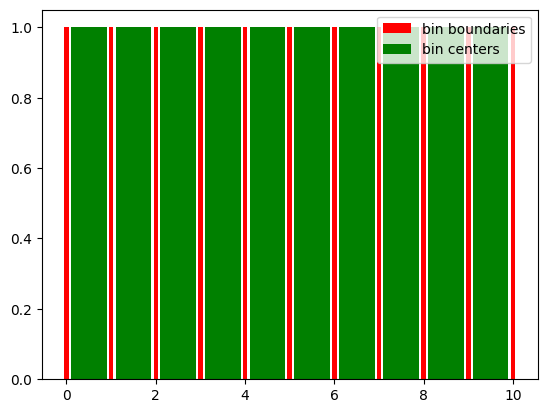

In [5]:
# Plot a representation of the bins.
plt.bar(xb, 1, color="red",   width=0.1, label="bin boundaries")
plt.bar(xc, 1, color="green", width=0.8, label="bin centers")
plt.legend(loc="upper right")

# Print the values.
print(f"Bin boundaries:\n{xb = }\n")
print(f"Bin centers:\n{xc = }\n")
print(f"Bin widths:\n{xw = }\n")

In [6]:
# For each of the indices, get the corresponding value (of the bin center).
for i in range(N):
    x_i = axis.value_from_index(i)
    print(f"{i = }\t\t-> {x_i = }")

i = 0		-> x_i = 0.5
i = 1		-> x_i = 1.5
i = 2		-> x_i = 2.5
i = 3		-> x_i = 3.5
i = 4		-> x_i = 4.5
i = 5		-> x_i = 5.5
i = 6		-> x_i = 6.5
i = 7		-> x_i = 7.5
i = 8		-> x_i = 8.5
i = 9		-> x_i = 9.5


In [7]:
# For each of the bin boundary values, get the corresponding bin index.
for x in xb:
    try:
        i_x = axis.index_from_value(x)
    # ATTENTION: `index_from_value` does NOT work for the left-most border!
    except IndexError:
        i_x = f"No bin found for {x = }"
        
    print(f"{x = } \t-> {i_x = }")

x = 0.0 	-> i_x = 'No bin found for x = 0.0'
x = 1.0 	-> i_x = 0
x = 2.0 	-> i_x = 1
x = 3.0 	-> i_x = 2
x = 4.0 	-> i_x = 3
x = 5.0 	-> i_x = 4
x = 6.0 	-> i_x = 5
x = 7.0 	-> i_x = 6
x = 8.0 	-> i_x = 7
x = 9.0 	-> i_x = 8
x = 10.0 	-> i_x = 9


In [8]:
# For each of the bin center values, get the corresponding bin index.
for x in xc:
    i_x = axis.index_from_value(x)
    print(f"{x = }\t\t-> {i_x = }")

x = 0.5		-> i_x = 0
x = 1.5		-> i_x = 1
x = 2.5		-> i_x = 2
x = 3.5		-> i_x = 3
x = 4.5		-> i_x = 4
x = 5.5		-> i_x = 5
x = 6.5		-> i_x = 6
x = 7.5		-> i_x = 7
x = 8.5		-> i_x = 8
x = 9.5		-> i_x = 9


### Test with logarithmic scale.

In [9]:
# Define: Axis limits, nr. of bins, & scale.
x_min = 1e-15 
x_max = 1e+6
N     = 10
scale = "log"

# From this, initialize the `DiscreteAxis` object.
axis = DiscreteAxis(x_min, x_max, N, scale)
# ATTENTION: 
# Set x_min=1e-5, x_max=1e+6, N=10 
# -> Assertion error, only valid up to machine precision.
#    TODO: Handle?

# Load arrays containing values of bin centers, boundaries, & widths.
xc = axis.grid_cell_centers
xb = axis.grid_cell_boundaries
xw = axis.grid_cell_widths

Bin boundaries:
xb = array([1.00000000e-15, 1.25892541e-13, 1.58489319e-11, 1.99526231e-09,
       2.51188643e-07, 3.16227766e-05, 3.98107171e-03, 5.01187234e-01,
       6.30957344e+01, 7.94328235e+03, 1.00000000e+06])

Bin centers:
xc = array([1.12201845e-14, 1.41253754e-12, 1.77827941e-10, 2.23872114e-08,
       2.81838293e-06, 3.54813389e-04, 4.46683592e-02, 5.62341325e+00,
       7.07945784e+02, 8.91250938e+04])

Bin widths:
xw = array([1.24892541e-13, 1.57230394e-11, 1.97941338e-09, 2.49193381e-07,
       3.13715880e-05, 3.94944893e-03, 4.97206162e-01, 6.25945472e+01,
       7.88018661e+03, 9.92056718e+05])



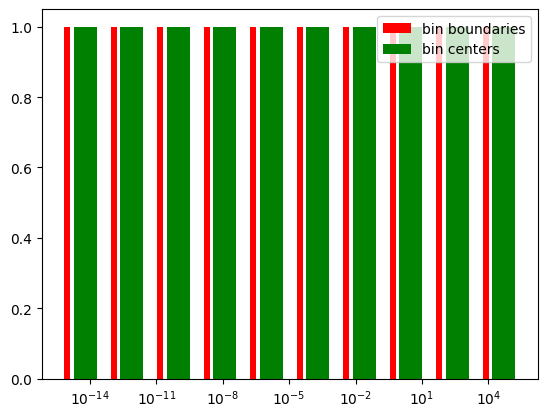

In [10]:
# Plot a representation of the bins.
fig, ax = plt.subplots()
ax.set_xscale('log')
plt.bar(xb[:-1], 1, color="red",   width=xw*0.005, label="bin boundaries")  
plt.bar(xc,      1, color="green", width=xw*0.15, label="bin centers")
plt.legend(loc="upper right")

# ATTENTION: 
# Due to shape mismatch, the last boundary value is not drawn here.
# It does exist though! -> Analogous to linear scale.

# Print the values.
print(f"Bin boundaries:\n{xb = }\n")
print(f"Bin centers:\n{xc = }\n")
print(f"Bin widths:\n{xw = }\n")

In [11]:
# For each of the indices, get the corresponding value (of the bin center).
for i in range(N):
    x_i = axis.value_from_index(i)
    print(f"{i = }\t-> {x_i = :.2e}")

i = 0	-> x_i = 1.12e-14
i = 1	-> x_i = 1.41e-12
i = 2	-> x_i = 1.78e-10
i = 3	-> x_i = 2.24e-08
i = 4	-> x_i = 2.82e-06
i = 5	-> x_i = 3.55e-04
i = 6	-> x_i = 4.47e-02
i = 7	-> x_i = 5.62e+00
i = 8	-> x_i = 7.08e+02
i = 9	-> x_i = 8.91e+04


In [12]:
# For each of the bin boundary values, get the corresponding bin index.
for x in xb:
    try:
        i_x = axis.index_from_value(x)
    # ATTENTION: `index_from_value` does NOT work for the left-most border!
    except IndexError:
        i_x = f"No bin found for {x=}"
        
    print(f"{x = :.2e}\t{i_x = }")

x = 1.00e-15	i_x = 'No bin found for x=1e-15'
x = 1.26e-13	i_x = 0
x = 1.58e-11	i_x = 1
x = 2.00e-09	i_x = 2
x = 2.51e-07	i_x = 3
x = 3.16e-05	i_x = 4
x = 3.98e-03	i_x = 5
x = 5.01e-01	i_x = 6
x = 6.31e+01	i_x = 7
x = 7.94e+03	i_x = 8
x = 1.00e+06	i_x = 9


In [13]:
# For each of the bin center values, get the corresponding bin index.
for x in xc:
    i_x = axis.index_from_value(x)
    print(f"{x = :.2e}\t-> {i_x = }")

x = 1.12e-14	-> i_x = 0
x = 1.41e-12	-> i_x = 1
x = 1.78e-10	-> i_x = 2
x = 2.24e-08	-> i_x = 3
x = 2.82e-06	-> i_x = 4
x = 3.55e-04	-> i_x = 5
x = 4.47e-02	-> i_x = 6
x = 5.62e+00	-> i_x = 7
x = 7.08e+02	-> i_x = 8
x = 8.91e+04	-> i_x = 9
